## Exercícios de Classificação
**Lista 3**

Para este exercício, será utilizado o dataset de sobreviventes do titanic. Os dados já
encontram-se separados em arquivos de treino (train.csv) e teste (test.csv). Neste dataset,
encontram-se informações como sexo, idade, classe socio-ecônomica, entre outras. Abaixo,
você encontra o dicionário dos dados, contendo a descrição do que cada atributo e seus
respectivos valores representam.

1. Execute uma análise exploratória dos dados. Elabore gráficos, calcule estatísticas e
obtenha inferências iniciais sobre os dados. Discorra sobre as inferências realizadas.

2. Realize o pré-processamento dos dados. Faça as limpezas e formatações que julgar
necessárias para obter um conjunto de dados consistente. (Dica: você pode juntar os
dois arquivos de dados em um único dataframe para facilitar a manipulação!).


In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model as lm
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import ConfusionMatrix
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
#from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
%matplotlib inline
#from pandas_profiling import ProfileReport

ImportError: cannot import name 'ConfusionMatrix' from 'sklearn.metrics' (C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

**Carrengando o dataset de treino**

In [447]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [448]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Concatenando os dois DFs (df_test e df_train)**

Nesta etapa foi necessário juntar os DFs para melhorar a exploração e limpeza dos dados. Para isso, utilizamos a função do pandas `concat` e o parâmetro `ignore_index` com valor `True` para garantir que não haveria a repetição dos índices . Observa-se que nessa junção a coluna `Survived` ficou à direta e com vários valores NaN, isto ocorreu porque esta coluna não constava no `df_test` e os valores de suas linhas foram separados das colunas, significa dizer que parte dos seus valores estão nas linhas e parte nas colunas. Provavelmente esta não é a melhor solução para junção destes Dfs. Em todo caso iremos tratar os NaN das colunas e continuar com essa abordagem.

In [449]:
df_unido = pd.concat([df_test, df_train], ignore_index=True)
df_unido.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


# Estudar como usa o Profiling
**Visão Geral do DF com `pandas_profiling`**

*Função do Python que exibe todas as estatísticas*

In [450]:
#profile = ProfileReport(df_unido)
#profile.to_notebook_iframe()

In [451]:
# exibindo as colunas do DF após unir o df_test e df_train
df_unido.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

*Definindo a coluna PassengerId como índice*

In [452]:
#df = df_unido.set_index('PassengerId', inplace=False) # coloquei a coluna PassengerId como índice
#df

In [453]:
df_unido['Survived'] 
# porque estes dados ficaram como float e não inteiro?
# observando o arquivo de treino todas as células estão preenchidas o que não justifica a presença desses NaN que são interpretados 
# desta forma quando as células não possuem valores.

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [454]:
# verificando se há NaN e somando todos por coluna
df_unido.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

*Calculando o percentual de NaN nas colunas em relação ao total de linhas. Isto ajuda a verificar o impacto da ausência 
(caso opte por dropar) na análise dessas informações para a regra de negócio.*

In [455]:
# Soma dos valores NaN em relação as linhas (por isso o shape está setado em 0), multiplicado por 100
df_unido.isnull().sum()/df_unido.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
Survived       31.932773
dtype: float64

*A coluna `Survived` é importante para a análise da questão 3, logo precisamos ter cuidado ao decidir o que será feito com os NaN. Provavelmente não deverá ser eliminada e deveremos optar pela a técnica de "imputação múltipla" que consite em substituir o NaN por uma valor mais recorrente na coluna do DF*

**Eliminando colunas**

*No caso desta coluna o mais recomendado seria eleminá-la uma vez que tem mais de 70% de NaN. Substituir os valores não seria uma boa opção, pois iria apenas "mascarar" as informações desta feature e poderia prejudicar as predições* 

In [456]:
df_unido.drop(columns = ['Ticket','Fare','Cabin','Name'], inplace = True)
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,NaN
1,893,3,female,47.0,1,0,S,NaN
2,894,2,male,62.0,0,0,Q,NaN
3,895,3,male,27.0,0,0,S,NaN
4,896,3,female,22.0,1,1,S,NaN


In [457]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1307 non-null   object 
 7   Survived     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


**Tratando os NaN**

*Utilizamos a técnica de imputação única através da função `SimpleImputer` da biblioteca do Sklearn com o parâmetro `strategy` definido por `mean` ,isto é, média. Para isso precisamos importar no módulo `impute` o `SimpleImputer`.*

In [458]:
from sklearn.impute import SimpleImputer 

# substituição dos valores NaN pela estratégia da média para a coluna Survived
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

*Para aplicar a estratégia `SimpleImputer` para a substituição na coluna é necessário fazer a combinação com `fit_transform`*

In [459]:
# substituição dos valores NaN pela estratégia da média combinado com fit_transform 
df_unido.Survived = mean_imputer.fit_transform(df_unido[['Survived']])
df_unido.Age = mean_imputer.fit_transform(df_unido[['Age']])
# substituição dos valores NaN pela estratégia da média para a coluna Embarked, pois é a estratégia recomendada para feature categórica
most_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_unido.Embarked = most_imputer.fit_transform(df_unido[['Embarked']])
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,0.383838
1,893,3,female,47.0,1,0,S,0.383838
2,894,2,male,62.0,0,0,Q,0.383838
3,895,3,male,27.0,0,0,S,0.383838
4,896,3,female,22.0,1,1,S,0.383838


*Removendo a linha que contém o NaN na coluna Fare. Como é apenas um único dado e não ultrapassa de 10% da base de dados 
então este procedimento não se torna prejudicial para as análises*

In [460]:
# Armazenando em uma variável a remoção da linha que contém o NaN. O inplace setado como "False" para não aplicar a remoção no df_unido
df_clean = df_unido.dropna(axis=0, inplace = False)
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,0.383838
1,893,3,female,47.0,1,0,S,0.383838
2,894,2,male,62.0,0,0,Q,0.383838
3,895,3,male,27.0,0,0,S,0.383838
4,896,3,female,22.0,1,1,S,0.383838


In [461]:
# Calculando o percentual de NaN no df_clean, somente para visualizar se a remoção da linha que tinha NaN deu certo. 
df_clean.isnull().sum()/df_clean.shape[0]*100

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [462]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

## Análise Exploratória dos Dados (AED)

In [463]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

In [464]:
df_unido.duplicated().value_counts()

False    1309
dtype: int64

In [465]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1309 non-null   object 
 7   Survived     1309 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [466]:
df_unido.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,0.383838
std,378.020061,0.837836,12.883193,1.041658,0.865560,0.401381
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,0.000000
50%,655.000000,3.000000,29.881138,0.000000,0.000000,0.383838
75%,982.000000,3.000000,35.000000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,1.000000


In [467]:
df_unido.corr('pearson')

,PassengerId,Pclass,Age,SibSp,Parch,Survived
PassengerId,1.000000,-0.038354,0.025731,-0.055224,0.008942,-0.002812
Pclass,-0.038354,1.000000,-0.366371,0.060832,0.018322,-0.278618
Age,0.025731,-0.366371,1.000000,-0.190747,-0.130872,-0.058544
SibSp,-0.055224,0.060832,-0.190747,1.000000,0.373587,-0.030845
Parch,0.008942,0.018322,-0.130872,0.373587,1.000000,0.062706
Survived,-0.002812,-0.278618,-0.058544,-0.030845,0.062706,1.000000


<AxesSubplot:title={'center':'Sobreviventes por idade'}, ylabel='Frequency'>

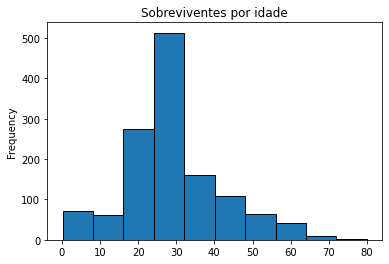

In [468]:
df_unido['Age'].plot.hist(edgecolor='black', title= 'Sobreviventes por idade')

<AxesSubplot:title={'center':'Sobreviventes por classe (1ª, 2ª, 3ª)'}, ylabel='Frequency'>

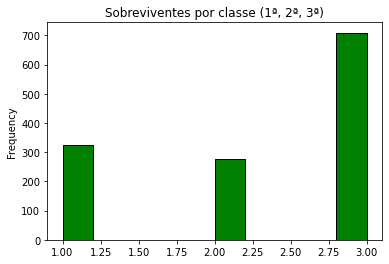

In [469]:
df_unido['Pclass'].plot.hist(edgecolor='black', title= 'Sobreviventes por classe (1ª, 2ª, 3ª)', color= 'green')

<AxesSubplot:title={'center':'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic'}, ylabel='Frequency'>

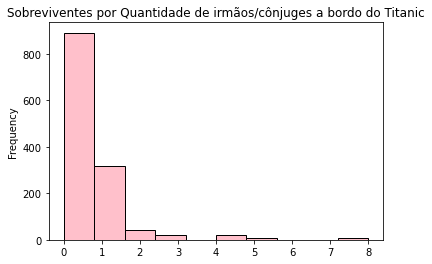

In [470]:
df_unido['SibSp'].plot.hist(edgecolor='black', title= 'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic', color= 'pink')

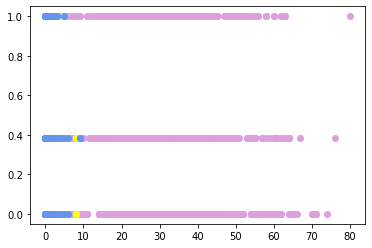

In [471]:
#gráfico de dispersão 
plt.scatter(df_unido['Pclass'], df_unido['Survived'], color= 'green')
plt.scatter(df_unido['Age'], df_unido['Survived'], color = 'Plum')
plt.scatter(df_unido['SibSp'], df_unido['Survived'], color = 'yellow')
plt.scatter(df_unido['Parch'], df_unido['Survived'], color = 'CornflowerBlue')

In [472]:
# agrupando por sexo
colunas_selecionadas = ['Sex', 'Survived']

In [473]:
df_titanic = df_unido.filter(items=colunas_selecionadas)

In [474]:
df_titanic.head()

,Sex,Survived
0,male,0.383838
1,female,0.383838
2,male,0.383838
3,male,0.383838
4,female,0.383838


In [475]:
df_titanic.groupby(by=["Sex"]).count()

,Survived
Sex,
female,466
male,843


Sex
female    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
male      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

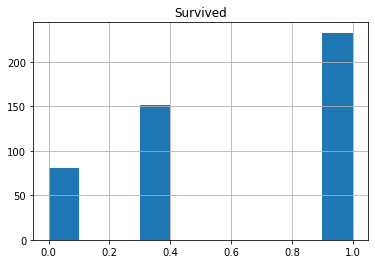

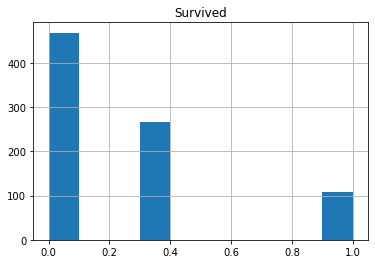

In [476]:
# Hinessa preciso que me ajude a entender esse gráfico
df_titanic.groupby(by=["Sex"]).hist()

In [477]:
df_titanic.groupby(by=["Sex"]).describe()

Survived                                                            
          count      mean       std  min       25%       50%       75%  max
Sex                                                                        
female    466.0  0.625201  0.396887  0.0  0.383838  0.691919  1.000000  1.0
male      843.0  0.250416  0.336475  0.0  0.000000  0.000000  0.383838  1.0

In [478]:
# transformando os dados das colunas Sex, Embarked em int ou float 

**Atribuindo valores numéricos à coluna "Sex"**

1 = male

2 = female

In [479]:
df_unido.loc[df_unido.Sex=='male','Sex'] = 1
df_unido.loc[df_unido.Sex=='female','Sex'] = 2

**Atribuindo valores numéricos à coluna "Embarked"**

3 = C

4 = Q

5 = S

In [480]:
df_unido.loc[df_unido.Embarked=='S','Embarked'] = 3
df_unido.loc[df_unido.Embarked=='C','Embarked'] = 4
df_unido.loc[df_unido.Embarked=='Q','Embarked'] = 5

In [481]:
df_unido.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,5,0.383838
1,893,3,2,47.0,1,0,3,0.383838
2,894,2,1,62.0,0,0,5,0.383838
3,895,3,1,27.0,0,0,3,0.383838
4,896,3,2,22.0,1,1,3,0.383838


**Verificando os tipos de dados das colunas**

In [482]:
df_unido.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Survived       float64
dtype: object

**Tranformando os dados das colunas Sex, Age, Embarked e Survived (`float`) em dados do tipo `int`**

In [483]:
df_unido['Sex']= df_unido['Sex'].astype(int)
df_unido['Age']= df_unido['Age'].astype(int)
df_unido['Embarked'] = df_unido['Embarked'].astype(int)
df_unido['Survived'] = df_unido['Survived'].astype(int)
df_unido

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34,0,0,5,0
1,893,3,2,47,1,0,3,0
2,894,2,1,62,0,0,5,0
3,895,3,1,27,0,0,3,0
4,896,3,2,22,1,1,3,0
...,...,...,...,...,...,...,...,...
1304,887,2,1,27,0,0,3,0
1305,888,1,2,19,0,0,3,1
1306,889,3,2,29,1,2,3,0
1307,890,1,1,26,0,0,4,1


# Parei aqui 17/09 - estudar KNN 
**Dividindo o dataset em train e test**

In [484]:
# Separando as colunas exceto a Survived que será o y
X = df_unido[df_unido.columns[:-1]]
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34,0,0,5
1,893,3,2,47,1,0,3
2,894,2,1,62,0,0,5
3,895,3,1,27,0,0,3
4,896,3,2,22,1,1,3
...,...,...,...,...,...,...,...
1304,887,2,1,27,0,0,3
1305,888,1,2,19,0,0,3
1306,889,3,2,29,1,2,3
1307,890,1,1,26,0,0,4


In [485]:
# Separando os dados que irei estimar
y = df_unido[df_unido.columns[-1:]]
y

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
1304,0
1305,1
1306,0
1307,1


In [486]:
[X_train, X_test, y_train, y_test]= train_test_split(X, y,test_size = 0.3, random_state=2)

In [487]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
886,469,3,1,29,0,0,5
293,1185,1,1,53,1,1,3
1207,790,1,1,46,0,0,4
658,241,3,2,29,1,0,4
1094,677,3,1,24,0,0,3
...,...,...,...,...,...,...,...
18,910,3,2,27,1,0,3
1034,617,3,1,34,1,1,3
155,1047,3,1,24,0,0,3
600,183,3,1,9,4,2,3


Padronizando os dados em uma mesma escala

In [488]:
scaler = MinMaxScaler()
scaler.fit(X, Y)
scaled = scaler.transform(X)

3. Crie um classificador para predizer se um passageiro sobreviveu ou não a partir dos
atributos presentes no dataset. Utilize os algoritmos KNN, Regressão Logística e
Naive Bayes para criar os modelos. Crie um modelo para cada algoritmo.

## **KNN**

In [489]:
y = y_train.ravel()
y_train = np.array(y).astype(int)
model = forest.fit(train_fold, y_train)

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [490]:
# Modelo de classificador para K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Acurácia**

In [491]:
accuracy_score(y_test, y_pred)

0.6972010178117048

## **Matriz de Confusão**

In [492]:
mc = ConfusionMatrix(knn)
mc.fit(X_train, y_train)
mc.score(X_test, y_train)

NameError: name 'ConfusionMatrix' is not defined

## **Regressão Logística**

## **Naive Bayes**

**Referências Bibliográficas**

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

https://medium.com/data-hackers/tratamento-e-transforma%C3%A7%C3%A3o-de-dados-nan-uma-vis%C3%A3o-geral-e-pr%C3%A1tica-54efa9fc7a98

https://www.youtube.com/watch?v=ojA65o8N0iM&t=684s

https://datatofish.com/check-nan-pandas-dataframe/

http://www.each.usp.br/lauretto/SIN5008_2011/aula01/aula1#:~:text=A%20%EF%AC%81nalidade%20da%20An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20%28AED%29,digita%C3%A7%C3%A3o%20de%20dados%20em%20um%20banco%20de%20dados

https://pypi.org/project/pandas-profiling/

https://www.youtube.com/watch?v=TRatkPjzHNE

https://minerandodados.com.br/validacao-cruzada-aprenda-de-forma-simples-como-usar-essa-tecnica/#:~:text=Uma%20das%20maneiras%20de%20fazer%20a%20divis%C3%A3o%20desses,dos%20dados%20para%20treino%20e%2030%25%20para%20teste.

https://minerandodados.com.br/7-tipos-graficos-cientista-de-dados/

https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn